# **Actividad 3:** Patrones con K-means
### Integrantes:

*   Tania Regina Ramírez Vázquez - A01654087
*   Juan Antonio Mancera Velasco - A01662634
*   Owen Rosales Castro - A01660320


## Importación de librerías



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Carga de datos

In [ ]:
datos = pd.read_csv("covid19_tweets.csv")
datos

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


#Selección de variables

> Se han dejado fuera ciertas variables que no aportan información para el agrupamiento. Ya sea porque requieren un análisis más profundo como el caso del texto, o porque no cambian su valor en las tuplas como Is_retweeted, que siempre es falso. Se realiza el algoritmo de clustering solo para user_followers y user_friends.








In [ ]:
variables = datos.columns
print(variables)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')


Las variables a utiilizar son las siguientes:

In [ ]:
datos = datos[['user_followers', 'user_friends']]
datos

,user_followers,user_friends
0,624,950
1,2253,1677
2,9275,9525
3,197,987
4,101009,168
...,...,...
74431,85,586
74432,4289,1066
74433,1413,102
74434,2554,1733


## Análisis de la popularidad de los usuarios

Media de seguidores: En promedio, las personas en este conjunto de datos tienen alrededor de 105,951 seguidores.

Mediana de amigos: La mitad de las personas en el conjunto de datos tienen menos de 552 amigos, y la otra mitad tiene más de 552 amigos.

Desviación estándar de seguidores: Hay una gran variabilidad en el número de seguidores entre las personas en el conjunto de datos. Algunas personas pueden tener un número muy alto de seguidores, mientras que otras tienen muy pocos, lo que crea una gran dispersión en los datos.

In [ ]:
# Calcular estadísticas de popularidad
mean_followers = datos['user_followers'].mean()
median_friends = datos['user_friends'].median()
std_dev_followers = datos['user_followers'].std()

print(f'Media de seguidores: {mean_followers}')
print(f'Mediana de amigos: {median_friends}')
print(f'Desviación estándar de seguidores: {std_dev_followers}')

Media de seguidores: 105951.31291310657
Mediana de amigos: 552.0
Desviación estándar de seguidores: 822289.9854933608


## Correlación entre seguidores y amigos

La correlación entre seguidores y amigos (-0.0027) indica una relación débil entre estas dos variables en el conjunto de datos.

In [ ]:
correlation = datos['user_followers'].corr(datos['user_friends'])
print(f'Correlación entre seguidores y amigos: {correlation}')

Correlación entre seguidores y amigos: -0.0027223651183808937


## Visualización de la estructura de usuarios respecto a tweets de Covid-19


La finalidad de este gráfico es explorar si existe alguna relación aparente entre el número de seguidores y el número de amigos de los usuarios que han realizado tweets sobre Covid-19. La dispersión de los puntos en el gráfico ayudará a visualizar si hay algún patrón o tendencia en los datos. Por ejemplo, si los puntos se agrupan en una forma específica o siguen alguna dirección, podría indicar una correlación o relación entre estas dos variables.

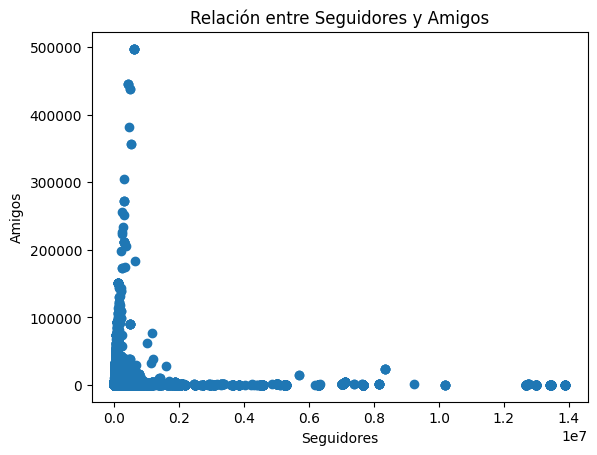

In [ ]:
import matplotlib.pyplot as plt

# Graficar scatter plot
plt.scatter(datos['user_followers'], datos['user_friends'])
plt.xlabel('Seguidores')
plt.ylabel('Amigos')
plt.title('Relación entre Seguidores y Amigos')
plt.show()

## Uso de K-Means para la segmentación de usuarios

Este código utiliza el algoritmo K-Means para dividir a los usuarios en grupos basados en sus números de seguidores y amigos, y luego muestra visualmente estos grupos en un gráfico de dispersión. Esta técnica puede ayudar a identificar patrones o segmentos de usuarios con características similares en una población de usuarios.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-486cd938aaee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['cluster'] = labels


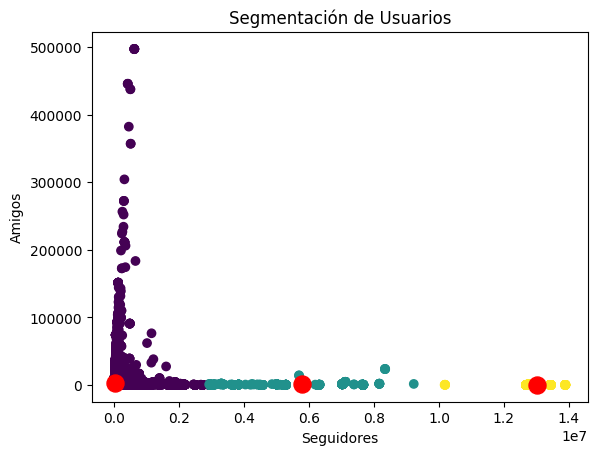

Distancia entre el punto 0 y el punto 1: 5742783.52
Distancia entre el punto 0 y el punto 2: 12977485.55
Distancia entre el punto 1 y el punto 2: 7234702.09


In [18]:
# Preparar datos para clustering
X = datos[['user_followers', 'user_friends']]

# Crear y entrenar el modelo de K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Obtener las etiquetas de los clusters para cada usuario
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
datos['cluster'] = labels

# Visualizar los clusters
plt.scatter(datos['user_followers'], datos['user_friends'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label='Centroides')

plt.xlabel('Seguidores')
plt.ylabel('Amigos')
plt.title('Segmentación de Usuarios')
plt.show()

#función
def imprimir_distancia_entre_puntos(x_coords, y_coords):
    num_centros = len(x_coords)

    for i in range(num_centros):
        for j in range(i + 1, num_centros):
            distancia = np.sqrt((x_coords[i] - x_coords[j])**2 + (y_coords[i] - y_coords[j])**2)
            print(f"Distancia entre el punto {i} y el punto {j}: {distancia:.2f}")

imprimir_distancia_entre_puntos(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1])

# Elbow Method para determinar el número óptimo de clusters

El código implementa el Método del Codo para determinar el número óptimo de clusters en el conjunto de datos. La decisión se basa en la observación de cómo la inercia varía en función de diferentes valores de k, y el objetivo es encontrar el valor de k que ofrece un buen equilibrio entre la compacidad de los clusters y la simplicidad del modelo. Por consiguiente, el valor de k sugerido es 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

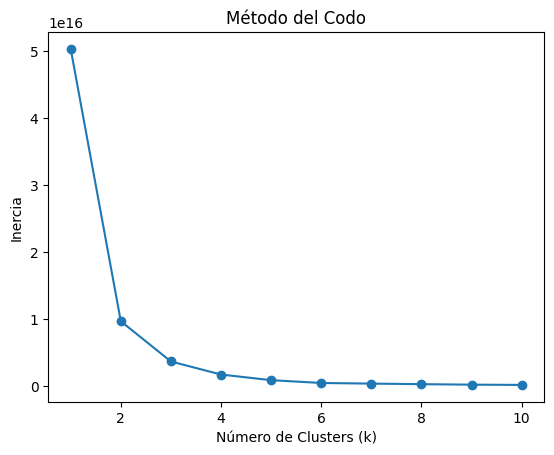

In [ ]:
X = datos[['user_followers', 'user_friends']]
inertias = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


###¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

 Los centros de cada cluster se muestran como puntos rojos en la gráfica. Estos representan los valores medios de 'user_followers' y 'user_friends' para cada cluster, lo que indica el punto central de cada grupo.

Observando la ubicación de los clusters y los centros, podemos inferir qué tipo de usuarios están siendo agrupados juntos. Por ejemplo, si un cluster tiene centros con un alto número de seguidores y amigos, puede indicar la presencia de usuarios influyentes.

###¿Cómo obtuviste el valor de k a usar?

Se utilizó el método del codo para determinar el valor de K. De forma sencilla, este método permite visualizar el comportamiento del ajuste para varias K, permitiendo ubicar un balance. Un número excesivo de centroides puede describir un modelo complejo que tiende excesivamente a los datos de entrenamiento. Pero muy pocos centroides pueden no capturar adecuadamente las estructuras subyacentes en los datos.


###¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Si se aumenta el valor de K, (crear más clusters), los centros estarán más cerca de los puntos de datos individuales. Esto puede llevar a una representatividad más precisa de los grupos.
Sin embargo, si se elige un valor extremadamente alto de K, corres el riesgo de sobreajustar el modelo y obtener clusters muy pequeños y no significativos, lo que dificultaría la interpretación.
Valor Más Bajo de K:

Si disminuyes el valor de K, los centroides estarán más alejados entre sí y representarán grupos más amplios. Esto puede llevar a una representatividad más general de los clusters.
Un valor muy bajo de K puede agrupar usuarios que son muy diferentes entre sí en un solo cluster, lo que podría ocultar patrones interesantes en los datos.


###¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?



* Distancia entre el punto 0 y el punto 1: 5,742,783.52
* Distancia entre el punto 0 y el punto 2: 12,977,485.55
* Distancia entre el punto 1 y el punto 2: 7,234,702.09

En general guardan distancias similares uno de otro. Cosa que comienza a perders a medida que el valor de K aumenta

###¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

A grandes razgos podrían influenciar el desplazamiento de centros. Esto para minimizar la suma de las distancias al cuadrado de los valores atípicos al centro. O también favorecer que un centro englobe más puntos (como para este caso). Y al mismo tiempo promover que sea necesario otro cluster si son demasiados. Específicamente al algoritmo de Kmeans podría tomarle más iteraciones llegar a una asignación estable de centros, ya que como el inicial se elige aleatoriamente, si son demasiadas sería probable tomar un centro inicial alejado si se inicia con un outlier.

###¿Qué puedes decir de los datos basándose en los centros?

Debido a la escala del gráfico (cantidades en el eje horizontal con respecto a las cantidades en el eje vertical) es característico que la mayoría de los usuarios (puntos) se encuentren cercanos al eje x (pocos seguidos). Fijando esta distancia como estandard podría decirse que hay tres casos distinguibles dados por los clusters encontrados. El primero, que engloba usuarios con demasiados amigos (seguidos) y muy pocos seguidores podría dar cuenta de usuarios bots, ya que de hecho tomando en cuenta la escala antes mencionada es el único cluster que presenta una relación muy por arriba de la distancia estandard respecto del eje x. El otro caso extremo retrataría a los usuarios influencers, quienes cuentan con una amplia base de seguidores con muy pocos amigos (seguidos). Y el caso intermedio que podría argumentarse se trata de usuarios promedio con seguidos (amigos) estandar y varios seguidos.